In [2]:
from selenium import webdriver
import time
from keras import models,layers
import matplotlib.pyplot as plt
import tensorflow
import pandas as pd
import numpy as np
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [3]:
try:
    driver=webdriver.Chrome("chromedriver.exe")
    driver.get("https://www.boletinoficial.gob.ar/#!Portada/primera/all")
    time.sleep(5)

    

    all_h2 = driver.find_elements_by_xpath("//*[@id='Primera']/h2[@class='ttlsection']")
    all_items = driver.find_elements_by_xpath("//*[@id='Primera']/div[@id='PorCadaNorma']")
    all_detalle_norma=driver.find_elements_by_xpath("//html/body/section[3]/div[2]/div[1]/section[1]/div[2]/div[1]/div")
    h2index=range(1,len(all_h2)+1)
    h3indexahref=range(1,len(all_items)+1)
    all_detalle_norma_rango=len(all_detalle_norma)
    
    print("=====================================================================================")
    listarubro=[]#LISTA DE RUBROS
    print("=====================================================================================")
    #INSERTAR ELEMENTOS A LISTA DE RUBROS
    for i in h2index:
        span=driver.find_element_by_xpath("/html/body/section[3]/div[2]/div[1]/div[6]/h2[{}]/span[1]".format(i))
        listarubro.append(span.text)
    #===========================================FIN INSERT

    print("=====================================================================================")
    listanorma=[]#LISTA DE NORMAS
    print("=====================================================================================")
    #INSERTAR ELEMENTOS A LISTA DE NORMAS
    for i in h3indexahref:
        ahref=driver.find_element_by_xpath("/html/body/section[3]/div[2]/div[1]/div[6]/div[{}]/div/h3/a".format(i))
        listanorma.append(ahref.text)
        
        
    #========================================FIN INSERT
        
    #=====================================================================
    #CREACION DE LISTA CON TODOS LOS ELEMENTOS DE PRIMERA SECCION
    divprimera=driver.find_element_by_xpath('//*[@id="Primera"]')
    divprimertext=divprimera.text
    listprimer=[]
    #=====================================================================FIN CREACION
    
    #LIMPIEZA E INSERSION DE DATOS A LISTA DE PRIMERA SECCION
    listprimer.append(divprimertext.split("\n"))
    primerlen=len(listprimer[0])
    #===========================================================FIN LIMPIEZA

    #=======================================================================
    #CREACION DE LISTA CON RUBRO Y DETALLENORMA ADENTRO FORMATO = 'RUBRO',[DETALLENORMA],'RUBRO',[DETALLENORMA]
    listaseparacion=[]
    for i in listprimer[0]:
        if i in listarubro:
            listaseparacion.append(i)
        if i in listanorma:
            listaseparacion.append(list([i]))
    #================================================FIN LISTA 'RUBRO',['DETALLENORMA']

    #==========================================================
    #CREACION DE DICCIONARIO {'RUBRO':[DETALLENORMA PERTENECIENTE A CADA RUBRO]}
    diccionarie={}
    def agregar_key(dictio):
        for i in listarubro:
            dictio[i]=[]
        keys=[]
        keys.extend(diccionarie.keys())
        key=keys[0]
        for i in listaseparacion:
            if i in keys:
                key=i
            else:
                diccionarie[key].extend(i)
        return dictio
            
    agregar_key(diccionarie)
    #====================================================FIN DICCIONARIO{'RUBRO':[DETALLENORMA]}
except:
    raise
finally:
    driver.close()


#### a partir de esta celda se encuentra los pasos para la creacion del Dataset con los datos de rubro,norma
#### que se actualizan si hay mas rubros,normas disponibles cada vez que ejecutamos el codigo anterior

In [4]:
#creacion del dataframe a partir del diccionario creado anteriormente, con un reset de indices para un mejor manejo
datos=pd.DataFrame.from_dict(diccionarie,orient="index").reset_index()
diccionario={"rubro":[],"detallenorma":[]}

for i in datos.T:
    for j in datos[i]:
        j=str(j)
        if j != 'None':
            
            diccionario["rubro"].append(datos.iloc[i,0])
            diccionario["detallenorma"].append(j)
datosgood=pd.DataFrame(diccionario)

In [5]:
#convertimos los datos a strings para el manejo de los nonetype values y que no nos tire error 
x=datosgood

In [6]:
X=x.iloc[:,0:1]
X=X.values
X
#Convertimos el dataFrame de pandas en un ndarray de numpy para el manejo de los valores

array([['DECRETOS'],
       ['DECRETOS'],
       ['DECRETOS'],
       ['DECRETOS'],
       ['DECRETOS'],
       ['DECRETOS'],
       ['DECRETOS'],
       ['DECRETOS'],
       ['DECRETOS'],
       ['DECISIONES ADMINISTRATIVAS'],
       ['DECISIONES ADMINISTRATIVAS'],
       ['DECISIONES ADMINISTRATIVAS'],
       ['DECISIONES ADMINISTRATIVAS'],
       ['DECISIONES ADMINISTRATIVAS'],
       ['DECISIONES ADMINISTRATIVAS'],
       ['DECISIONES ADMINISTRATIVAS'],
       ['RESOLUCIONES'],
       ['RESOLUCIONES'],
       ['RESOLUCIONES'],
       ['RESOLUCIONES'],
       ['RESOLUCIONES'],
       ['RESOLUCIONES'],
       ['RESOLUCIONES CONJUNTAS'],
       ['RESOLUCIONES CONJUNTAS'],
       ['RESOLUCIONES CONJUNTAS'],
       ['RESOLUCIONES CONJUNTAS'],
       ['RESOLUCIONES CONJUNTAS'],
       ['RESOLUCIONES SINTETIZADAS'],
       ['RESOLUCIONES SINTETIZADAS'],
       ['RESOLUCIONES SINTETIZADAS'],
       ['RESOLUCIONES SINTETIZADAS'],
       ['RESOLUCIONES SINTETIZADAS'],
       ['DISPOSICIONES'

In [7]:
Y=x.iloc[:,1:]
Y=Y.values
Y
#lo mismo del anterior paso

array([['PARTIDOS POLÍTICOS'],
       ['MINISTERIO DE TRANSPORTE'],
       ['SUPERINTENDENCIA DE SEGUROS DE LA NACIÓN'],
       ['SECRETARÍA DE COMERCIO EXTERIOR Y SECRETARÍA DE INDUSTRIA'],
       ['ENTE NACIONAL REGULADOR DE LA ELECTRICIDAD'],
       ['MINISTERIO DE SEGURIDAD - DIRECCIÓN NACIONAL DE SEGURIDAD EN ESPECTÁCULOS FUTBOLÍSTICOS'],
       ['INSTITUTO NACIONAL DE TECNOLOGÍA AGROPECUARIA'],
       ['ADMINISTRACIÓN FEDERAL DE INGRESOS PÚBLICOS - ADUANA NEUQUÉN'],
       ['ADMINISTRACIÓN FEDERAL DE INGRESOS PÚBLICOS'],
       ['FERIAS INTERNACIONALES'],
       ['MINISTERIO DEL INTERIOR, OBRAS PÚBLICAS Y VIVIENDA'],
       ['AGENCIA NACIONAL DE DISCAPACIDAD'],
       ['ENTE NACIONAL REGULADOR DE LA ELECTRICIDAD'],
       ['MINISTERIO DE PRODUCCIÓN Y TRABAJO - SUBSECRETARÍA DE PESCA Y ACUICULTURA'],
       ['ADMINISTRACIÓN FEDERAL DE INGRESOS PÚBLICOS - ADUANA NEUQUÉN'],
       ['ADMINISTRACIÓN FEDERAL DE INGRESOS PÚBLICOS'],
       ['COMISIÓN NACIONAL DE EVALUACIÓN Y ACREDITACIÓ

In [8]:
labelencoder_X=LabelEncoder()
labelencoder_X.fit(X)
X=labelencoder_X.transform(X)
print(X)
yei=[x for x in one_hot(str(Y),len(Y))]
yei=np.asarray(yei)
yei
#x_train,x_test,y_train,y_test=train_test_split(X,yei,test_size=0.25,random_state=0)

[4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 6 6 6 6 6 6 7 7 7 7 7 8 8 8 8 8 5 5 5 1 1
 1 0 0 0 2 2]


C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([30,  4, 10, 13, 32, 27, 13, 34, 13, 35, 20, 23, 13, 24, 42,  7,  5,
       13, 32,  3, 20, 13, 13, 35, 16, 10, 13, 35, 40, 20, 13, 35, 23, 30,
       41, 15, 20, 13, 32, 14, 19, 31, 13, 17, 32, 42, 41, 19, 31, 13, 17,
       24, 10, 10, 10, 16, 39, 35, 25,  7,  2,  2, 20, 13,  2,  3, 20, 13,
       13, 35, 16, 10, 13,  8,  7, 12, 37, 13, 10,  7, 11, 19, 31, 13, 17,
       32, 42, 41, 19, 31, 13, 17, 24, 11, 20, 13, 25,  7, 24, 30, 23, 13,
       41, 13, 12,  7, 25, 10, 13, 13, 19, 20, 13,  6, 19,  7, 32, 19, 19,
       31, 13, 17, 32, 42, 41, 19, 31, 13, 17, 24, 23, 13, 41, 13,  6, 11,
       11,  3, 16, 28, 19, 19, 20, 13,  6, 19,  7, 32, 19, 19, 31, 13, 17,
       32, 42, 41, 10, 20, 27, 27, 13, 34, 16, 22, 11, 20, 13, 12, 38, 33,
       42, 38, 40, 13, 37, 11, 19, 31, 13, 17, 32, 11, 42, 13, 40, 15, 20,
       13, 40,  7, 14, 15, 19, 31, 13, 17, 24, 19, 31, 13, 17, 32, 42,  3,
       15, 20, 13, 40,  7, 14, 15, 19, 31, 13, 17, 24, 19, 31, 13, 17, 32,
       42,  3, 15, 20, 13

In [18]:
#con esta funcion vamos a vectorizar los enteros a numpy arrays
def vectorizar(sequences,dimension=1000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
        return results
Yfull=vectorizar(yei)
Yfull
cx=np.asarray(X).astype('float32')
cx=cx.reshape(43,1)

In [19]:
equis=vectorizar(X.astype('int'))
equis.shape
equis2=np.asarray(equis).astype('float32')


In [20]:
print(equis2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
X
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(cx).toarray()


C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [22]:
X.shape

(43, 9)

In [23]:
yfull=np.asarray(Yfull).astype('float32')
X=np.asarray(X).astype('float32')

#y_labels_test=np.asarray(test_labels).astype('float32')

#utilizamos col en vez de un valor fijo para input_shape, para que el codigo tenga un poco mas de flexibilidad
#X=vectorizar(X)
col=X.shape[0]
print(equis2.shape,
yfull.shape)

(43, 1000) (269, 1000)


### a partir de esta celda se encuentra la creacion del modelo con keras (tensorflow backend)

In [24]:
#creacion del modelo con keras(tensorflow backend)
model=models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(1000,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#utilizaremos un modelo secuencial para un mejor manejo de secuencias(palabras)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#compilamos el modelo con algoritmo de optimizacion adam,de perdida binary_crossentropy (manejo de inputs binarios)

In [26]:
history=model.fit(equis2[:13],yfull[:13],epochs=22,batch_size=2,validation_data=(equis2[13:26],yfull[13:26]))
#entrenamiento de nuestro modelo

ValueError: Error when checking target: expected dense_6 to have shape (1,) but got array with shape (1000,)

In [20]:
# se ve horrible ya que tiene muy pocos ejemplos
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### utilizaremos las dict keys para generar graficos con matplotlib.pytplot

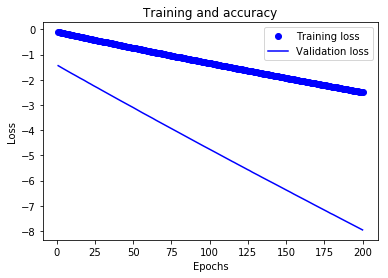

In [21]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

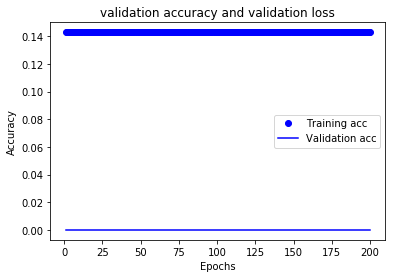

In [22]:
plt.clf()#figura limpia
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']


"""bo es por blue dot"""
plt.plot(epochs,acc,'bo',label='Training acc')
"""b es por solid blue line"""
plt.plot(epochs,val_acc,'b',label="Validation acc")
plt.title('validation accuracy and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
ad=np.random.rand(5,1000)

In [34]:
ad.shape

(5, 1000)

In [35]:
ad

array([[0.64669902, 0.74312567, 0.67325781, ..., 0.71401831, 0.49518147,
        0.29224191],
       [0.62506405, 0.45195175, 0.81277892, ..., 0.02268828, 0.48726401,
        0.74133387],
       [0.98677262, 0.03491767, 0.69487547, ..., 0.97764396, 0.26631458,
        0.21160774],
       [0.49156315, 0.34859239, 0.73846699, ..., 0.02481662, 0.3242154 ,
        0.18787698],
       [0.32222504, 0.38498428, 0.10168295, ..., 0.67963568, 0.29298406,
        0.5339573 ]])